In [1]:
import numpy as np
import networkx as nx
import scipy as sp

In [2]:
tr = 0.3
nodes = [0,1,2,3,4,5,6,7,8,9]
edges = [(0,1),(0,2),(0,3),(0,4),(0,7),
         (1,2),(1,3),(1,4),(1,7),
         (2,3),(2,4),(2,7),
         (3,4),(3,7),
         (4,7),
         (4,5),
         (5,6),(5,9),(5,10),
         (6,9),(6,10),(6,11),
         (7,8),
         (9,11),
         (10,11),
        ]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [3]:
A = nx.adjacency_matrix(G)
A = A.todense()
A

matrix([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)

In [4]:
from collections import defaultdict
from scipy.sparse import csr_matrix

def getSimilarity(fp, vec):
    return vec.dot(fp).max() / vec.sum()

def updateFingerprint(fp, vec, count):
    return (fp * ((count - 1) / count)) + (vec.toarray().astype(np.float) * (1 / count))

def findClusters(matrix, threshold=0.3):
    ''' fingerprint map
    {
        fp_index: [
            row_index,
            ...
        ],
        ...
    }
    '''
    fmap = defaultdict(list)

    ''' fingerprints '''
    fingerprints = []

    for ri, row in enumerate(matrix):
        if len(fingerprints) == 0:
            fmap[len(fingerprints)].append(0)
            fingerprints.append(row.toarray()[0].astype(np.float))
            continue
        
        match = False
        for fi, fp in enumerate(fingerprints[:]):
            score = getSimilarity(fp, row)

            if score > threshold:
                # map row to fingerprint
                fmap[fi].append(ri)
                # update this fingerprint with row weights
                fp[:] = updateFingerprint(fp, row, len(fmap[fi]))
                match = True

        if not match:
            fmap[len(fingerprints)].append(ri)
            fingerprints.append(row.toarray()[0].astype(np.float))
            
    return fingerprints, fmap
                
fps, fmap = findClusters(A)

AttributeError: 'matrix' object has no attribute 'toarray'

In [111]:
fps

[array([0.71428571, 0.71428571, 0.71428571, 0.71428571, 0.71428571,
        0.14285714, 0.        , 0.85714286, 0.14285714, 0.        ,
        0.        , 0.        ]),
 array([0. , 0. , 0. , 0. , 0.2, 0.6, 0.8, 0. , 0. , 0.6, 0.6, 0.6])]

In [112]:
fmap

defaultdict(list, {0: [0, 1, 2, 3, 4, 7, 8], 1: [5, 6, 9, 10, 11]})

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


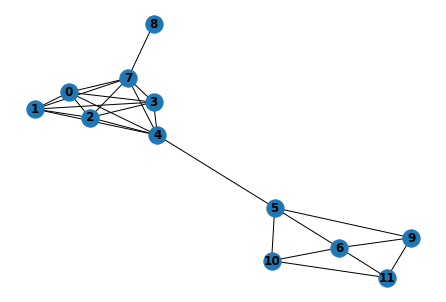

In [106]:
nx.draw(G, with_labels=True, font_weight='bold')

In [113]:
with open("email-Eu-core.txt", 'r') as f:
    Gr = nx.Graph()
    for line in f.readlines():
        (a,b) = line.split()
        Gr.add_edge(a,b)

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


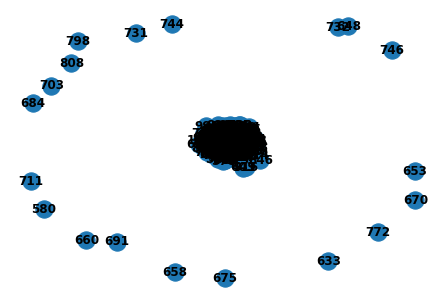

In [114]:
nx.draw(Gr, with_labels=True, font_weight='bold')

In [115]:
B = nx.adjacency_matrix(Gr)
fps, fmap = findClusters(B)

In [116]:
len(fps)

216

In [118]:
len(Gr.nodes)

1005

In [156]:
fp1 = np.array([0.9375, 0.9375, 0.875, 0.75, 0.5, 0.5, 0, 1, 0, 0, 0, 0])

In [11]:
a5 = np.array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])
a4 = np.array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [50]:
A[0].dot(a5).sum()

1

In [85]:
A[0].toarray()[0]

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [124]:
fp1

array([0.9375, 0.9375, 0.875 , 0.75  , 0.5   , 0.5   , 0.    , 1.    ,
       0.    , 0.    , 0.    , 0.    ])

In [129]:
fp2 = np.array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0])
a6 = 

In [138]:
float((fp2.dot(A[6].T))/12)

0.16666666666666666

In [143]:
fp3 = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [144]:
float((fp3.dot(A[7].T))/12)

0.0

In [146]:
fp4 = np.array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [147]:
float((fp3.dot(A[8].T))/12)

0.0

In [150]:
fp5 = A[8]

In [151]:
float((fp5.dot(A[9].T))/12)

0.0

In [152]:
fp6 = A[9]

In [153]:
float((fp6.dot(A[10].T))/12)

0.25

In [154]:
fp7 = A[10]

In [155]:
float((fp7.dot(A[11].T))/12)

0.08333333333333333

In [168]:
fp0 = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
fp1 = np.array([0.9375, 0.9375, 0.875, 0.75, 0.5, 0.5, 0, 1, 0, 0, 0, 0])
fp2 = A[5]
fp3 = A[6]
fp4 = A[7]
fp5 = A[8]
fp6 = A[9]
fp7 = A[10]
fp8 = A[11]

In [196]:
float((fp6.dot(fp8.T))/12)

0.08333333333333333

In [37]:
FP = A[0]
print(FP)
FP.todense()

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 7)	1


matrix([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]])

In [49]:
type(A)

scipy.sparse.csr.csr_matrix

In [53]:
print(A[3])

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (0, 7)	1
